# Ab initio-based symbolic model for Gravitational Waves

This notebook contains a symbolic model obtained through a genetic programming-based symbolic regression method for gravitational waves (GWs) emitted by the coalescence of non-spinning binary black holes corresponding to the $(2,2)$-mode and valid for $(q, t)\in[1, 10]\times[-2750, 100]s$, where $q$ stands for mass ratio and $t$ represents time. You can find the details in the paper [On ab initio-based, free and closed-form expressions for gravitational waves](https://arxiv.org/abs/1911.00644).

The ground truth model used for symbolic regression correspond to the surrogate model `SpEC_q1_10_NoSpin` which is hosted [here](https://zenodo.org/record/2669459#.YD0Rav7Q_eQ) and can be deployed with the [GWSurrogate](https://pypi.org/project/gwsurrogate/) Python package.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

Rename some functions such that they coincide with the names of the outputs imported from the symbolic regression software.

In [23]:
def asinh(x):
    return np.arcsinh(x)
def gauss(x):
    return np.exp(-x**2)
def atan2(x,y):
    return np.arctan2(x,y)
def exp(x):
    return np.exp(x)
def atan(x):
    return np.arctan(x)
def tanh(x):
    return np.tanh(x)
def cosh(x):
    return np.cosh(x)
def tan(x):
    return np.tan(x)

Comprise the symbolic waveforms in a single function `h_symbolic(q,t)`. This model was validated computing the overlap between symbolic and ground truth waveforms, scoring a minimum overlap of $99\%$.

In [35]:
def h_symbolic(q, t):
    t = 1e-3 * t # scaling factor
    
    amplitude = 1.37502533181183*gauss(atan2(t, 0.0409895367586908 - t))/(3.40043449934568 + q - t - 1.86434379599601*gauss(atan2(1.1446516014466, q) - 1.49686180948812*t)*gauss(atan2(t, 0.0250835926883564 - t - 0.108134472792241*t*q))) - 0.00178301085458751
    
    if 1. <= q <= 2.:
        phase = 16.9899198245249*atan2(0.0307964991839896, t)*asinh(8.47135183989294*t) + 0.517828856434813*t*cosh(q)*asinh(8.47135183989294*t)/atan2(0.0307964991839896, t) - 155.336099835965 - 23.6826537661638*t - 1.67469018319234*cosh(q) - 26.3800439393647*asinh(t) - 64.7124400428524*asinh(8.47135183989294*t)
    if 2. < q < 3.:
        phase = 6.83585963818032*t**2 + 29.2184323756819*t*exp(t) - 150.134280878147 - 5.63837416811418*q - 336.187115348329*t - 2.03916141015058*q*t - 0.462051355197209*asinh(224.317310349048*t) - 42.1012107484649*t*asinh(224.317310349048*t)
    if 3. <= q <= 4.:
        phase = -150.779871664876 - 5.48151705552273*q - 20.9244777358138*t - 40.725476363926*asinh(t) - 1.98410145646586*q*t - 58.0238952257731*atan(4.54076522147913*t) - 27.5236418372851*atan(27.0569353214333*t)*atan(4.54076522147913*t)
    if 4. < q <= 5.:
        phase = 8.5721194612964*tanh(t) + 4.77594286022371*t**2 + 1.71392847899927*q*t*tanh(t) - 153.735830018958 - 4.65044447419562*q - 301.17672677624*t - 0.401467421747743*asinh(300.050625169173*t) - 34.6087658515619*t*asinh(300.050625169173*t)    
    if 5. < q <= 6.:
        phase = 34.9967402431729*atan2(2.88396955316236, exp(18.5550015973867*t + (18.5550015973867*t**2)**0.56242721246326)) - 144.334463413931 - 4.56653604042429*q - 33.8215169236648*t - 53.5938957492291*exp(t) - 1.05498674575652*q*t*atan2(0.0457688186271425, exp(18.5550015973867*t + (18.5550015973867*t**2)**0.56242721246326))
    if 6. < q < 7.:
        phase = 1.16459728558136*t**2 + 2.04818853464955*asinh(-3031.15606950987*t) + 5.63150899599863*atan2(5.54505004946533, -3031.15606950987*t) + 19.5350382862564*t*asinh(-3031.15606950987*t) - 164.847087315508 - 4.24649927087975*q - 239.435021215528*t - 1.54209668558109*q*t
    if 7. <= q < 8.:
        phase = 42.5234029423116*atan2(-0.454286929738614, t) - 92.557645930759 - 3.87693080235069*q - 21.6846366746129*t - 1.40441380466267*t*q - 103.004616315544*asinh(3.4964623078196*t) - 31.6037083633658*atan(19.0682642359228*t)*asinh(3.4964623078196*t)
    if 8. <= q <= 9.:
        phase = 0.223595449207837*t**2 + 0.0228895534195837*exp(53.3803388021468*t) + 108.64303226437*t*asinh(asinh(-24.5987724166689*t)) - 162.16004867221 - 3.50199154150564*q - 307.395374115204*t - 0.565057456771371*t*q*asinh(asinh(-24.5987724166689*t))
    if 9. < q <= 10.:
        phase = 10.6554882562835*atan2(t, 0.561000822409326) + 0.390622102213681*q*t**2 - 164.868219149625 - 3.16971455362515*q - 293.785912743941*t - 33.3325708174699*t*asinh(174.055527284276*t) - 0.00463931687452369*q**2*asinh(174.055527284276*t)
    
    h = amplitude*(np.cos(phase)+1j*np.sin(phase))
    
    return h

Just produce some sampling of the time domain $[-2750, 100]s$. Here we choose the sampling rate used for the surrogate `SpEC_q1_10_NoSpin`.

In [26]:
T = np.linspace(-2750,100,28501)

Plot a waveform ($h_+$ in this case) for some $q\in[1, 10]$.

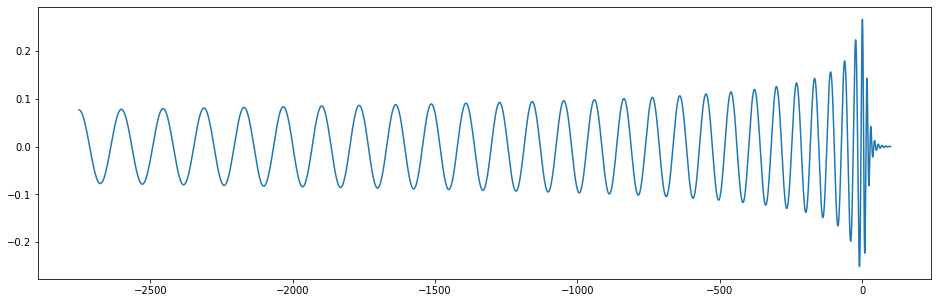

In [41]:
q = 3.4

plt.figure(figsize=(16,5))
plt.plot(T, np.real(h_symbolic(q, T)))